# Проект "Авиарейсы без потерь"

### для анализа рейсов из города Анапа загрузим наш датасет

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

df = pd.read_csv('0_project_4.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)


display(df)

,flight_id,flight_no,model,departure_airport,arrival_airport,actual_departure,count_ticket,count_seat_no,time_fl,total_amount,fuel_consumption,total_fuel_consumption,fuel_amount,profit
0,136698,PG0480,Sukhoi Superjet-100,AAQ,EGO,2016-12-01 09:30:00,94,94,0.816667,746400.0,1700,1388.333333,53960.35,692439.65
1,136774,PG0480,Sukhoi Superjet-100,AAQ,EGO,2016-12-02 09:27:00,93,93,0.833333,740100.0,1700,1416.666667,55061.58,685038.42
2,136873,PG0480,Sukhoi Superjet-100,AAQ,EGO,2016-12-03 09:26:00,96,96,0.850000,759000.0,1700,1445.000000,56162.81,702837.19
3,136843,PG0480,Sukhoi Superjet-100,AAQ,EGO,2016-12-04 09:30:00,78,78,0.833333,632400.0,1700,1416.666667,55061.58,577338.42
4,136943,PG0480,Sukhoi Superjet-100,AAQ,EGO,2016-12-05 09:28:00,94,94,0.833333,733800.0,1700,1416.666667,55061.58,678738.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,136120,PG0252,Boeing 737-300,AAQ,SVO,2017-02-24 10:07:00,109,109,1.650000,1605400.0,2400,3960.000000,156629.88,1448770.12
176,136439,PG0252,Boeing 737-300,AAQ,SVO,2017-02-25 10:08:00,117,117,1.666667,1701800.0,2400,4000.000000,158212.00,1543588.00
177,136351,PG0252,Boeing 737-300,AAQ,SVO,2017-02-26 10:13:00,105,105,1.666667,1555400.0,2400,4000.000000,158212.00,1397188.00
178,136266,PG0252,Boeing 737-300,AAQ,SVO,2017-02-27 10:08:00,108,108,1.666667,1566400.0,2400,4000.000000,158212.00,1408188.00


In [40]:
# Назначение колонок:
#    flight_id    -- идентификатор рейса,
#    flight_no    -- номер рейса,
#    model        -- модель самолета,
#    departure_airport     -- аэропорт вылета,
#    arrival_airport       -- аэропорт прилета,
#    actual_departure      -- фактическое время вылета,
#    count_ticket          -- количество билетов,
#    count_seat_no         -- количество занятых мест,
#    time_fl               -- время полета в часах,
#    total_amount          -- сумма вырученная от продажи билетов,
#    fuel_consumption      -- расход топлива для данного типа самолета в кг/час,
#    total_fuel_consumption -- потраченное топливо при перелете,
#    fuel_amount            -- стоимость в рублях затраченного топлива в рейсе,
#    profit                 -- Разница в рублях между суммой вырученной от продажи билетов и стоимости затраченного топлива
    
    

Проведем корреляционный анализ авиарейсов для определения наиболее связанных между собой факторов

In [38]:
correlation = df.corr()

<AxesSubplot:>

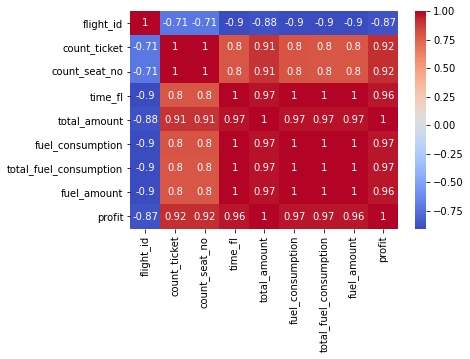

In [39]:
sns.heatmap(correlation, annot = True, cmap='coolwarm')

Из таблицы мы можем увидеть что прибыльность полета "PROFIT" зависит от модели самолета (расход топлива для данного самолета),
расхода топлива на рейс, сильно зависит от суммы за продажи билетов на рейс, количества проданных билетов и времени полета.


У нас самолеты двух типов Sukhoi Superjet-100 летающий в Белгород
и Boeing 737-300 летающий в Москву

Посмотрим по графику соотношение рейсов этих самолетов

<AxesSubplot:title={'center':'Количество рейсов за зиму'}>

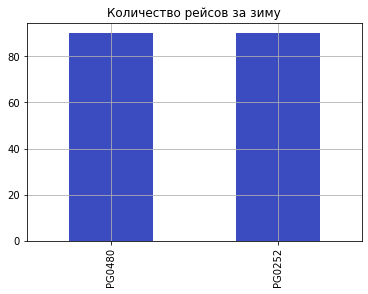

In [25]:
df['flight_no'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество рейсов за зиму')

Видно что соотношение рейсов одинаковое, они совершили практически одинаковое количество рейсов за зиму 2016-2017гг
Посмотрим как распределяется прибыль по количеству проданных билетов

<AxesSubplot:title={'center':'Общая сумма прибыли'}, xlabel='count_ticket', ylabel='profit'>

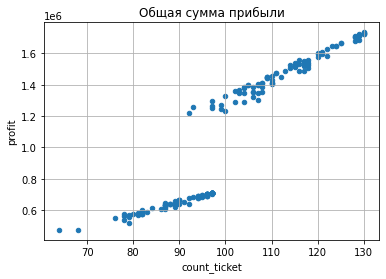

In [35]:
df.plot(x = 'count_ticket', 
        y = 'profit', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма прибыли')

Из графика видно что самолеты летают практически полные - Sukhoi Superjet-100 - 103 места и  на две трети Boeing 737-300 - 149 мест,
не проданные билеты относятся скорее всего к бизнес классу.
К концу зимы идет плавное нарастание числа пассажиров и как следствие прибыли

#### Вывод:

Рейсы подобраны оптимально, согласно спроса на перелеты в данное время года, а так же тип самолета в соответствии с дальностью полета и количеством пассажиров, так как в Москву пассажиров больше чем в Белгород.
Для своего класса и расстоянию перелета типы самолетов соответствуют выбранным маршрутам.
Потери небольшие в прибыли отмечаются только в начале зимы.
#### Убыточных рейсов на данных маршрутах не наблюдается, небольшое уменьшение прибыли зимой компенсируется прибылью в остальное время года.
Тот факт что рейс PG0252  в Москву заполнен в начале зимы чуть больше половины и до конца зимы потихоньку набирает количество
пассажиров обусловлен сезонностью наплыва отдыхающих - меньше зимой и больше ближе к лету.
Судя по графику -чем больше улетающих тем больше прилетающих.
